In [67]:
"""
author: Dominik Cedro
date: 01.02.2025
description: DFS and BFS comparison for Complex Systems lecture final presentation.
"""
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq # I will use it for prioritized queues
from matplotlib.animation import FuncAnimation

In [68]:
def parse_nodes(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) == 3:
                node_id, lon, lat = parts
                G.add_node(int(node_id), longitude=float(lon), latitude=float(lat))
    return G

def parse_edges(file_path, G):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) == 4:
                edge_id, start, end, distance = parts
                G.add_edge(int(start), int(end), weight=float(distance))
    return G


nodes_file_g = 'tree.node.txt'
edges_file_g = 'tree.edge.txt'

G = parse_nodes(nodes_file_g)
G = parse_edges(edges_file_g, G)

nodes_file_h = 'spider.node.txt'
edges_file_h = 'spider.edge.txt'

H = parse_nodes(nodes_file_h)
H = parse_edges(edges_file_h, H)

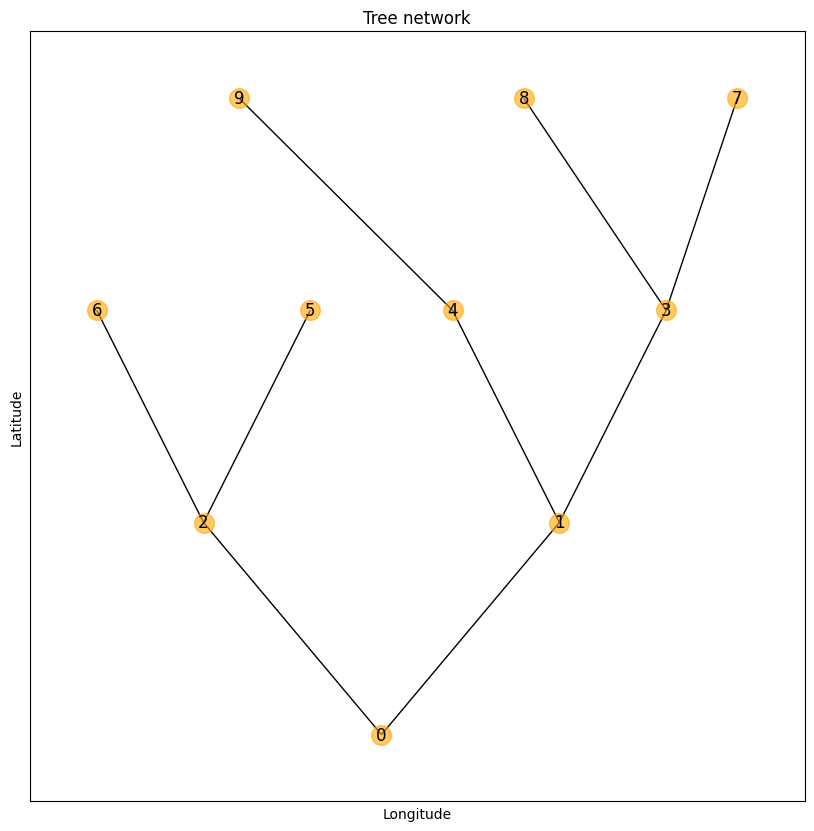

In [69]:
def visualize_network(G, title):
    pos = {node: (data['longitude'], data['latitude']) for node, data in G.nodes(data=True)}
    # weights = [G[u][v]['weight'] for u, v in G.edges()]
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='orange', alpha=0.6)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

visualize_network(G, 'Tree network')

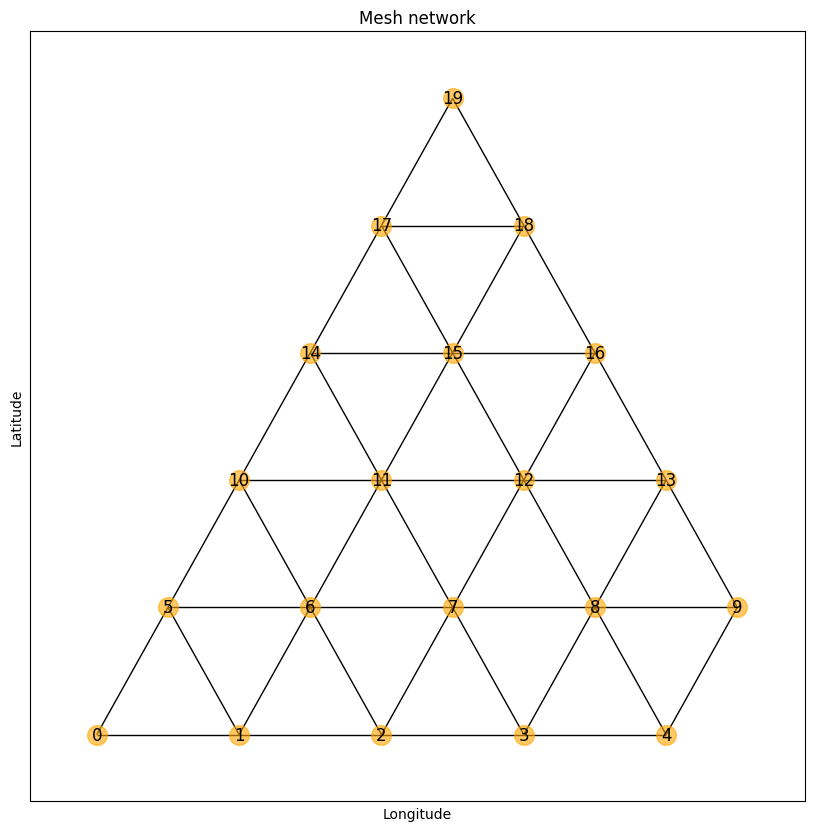

In [70]:
visualize_network(H, 'Mesh network')

Breadth first approach algorithm.

In [71]:
def breadth_first_search(graph, start_node, goal_node):
    visited = set()
    queue = [(0, start_node)]
    parent = {start_node: None}
    cost = {start_node: 0}

    while queue:
        current_cost, current_node = heapq.heappop(queue)
        if current_node == goal_node:
            return parent, visited, cost
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in graph.neighbors(current_node):
                edge_cost = graph[current_node][neighbor].get('weight', 1)
                new_cost = cost[current_node] + edge_cost
                if neighbor not in visited:
                    if neighbor not in cost or new_cost < cost[neighbor]:
                        cost[neighbor] = new_cost
                        heapq.heappush(queue, (new_cost, neighbor))
                        parent[neighbor] = current_node

    return parent, visited, cost

Animation of BFS algorithm.


In [72]:
def animate(network, path, total_cost, explored, name):
    
    # Visualization
    pos = {node: (data['longitude'], data['latitude']) for node, data in network.nodes(data=True)}
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw all nodes and edges
    nx.draw_networkx_edges(network, pos, ax=ax, width=1, edge_color='gray', alpha=0.5)
    nodes_plot = nx.draw_networkx_nodes(network, pos, ax=ax, node_size=100, node_color='ORANGE', alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    # Initialize exploration and path
    explored_nodes_plot = set()
    path_edges = []
    
    def update(frame):
        node = frame
        explored_nodes_plot.add(node)
        # Update node colors: explored nodes in red, others in blue
        node_colors = ['red' if n in explored_nodes_plot else 'blue' for n in network.nodes()]
        nodes_plot.set_color(node_colors)
        return nodes_plot,
    
    # Ensure explored is a list
    explored = list(explored)
    
    # To manage file size, you can sample the frames. For example, take every 10th node.
    # Adjust the step as needed.
    sample_step = 1
    sampled_explored = explored[::sample_step]
    
    ani = FuncAnimation(fig, update, frames=sampled_explored, repeat=False, blit=True, interval=10)
    
    # For GIF (uncomment the following line if you prefer GIF and have ImageMagick installed):
    ani.save(name, writer='imagemagick', fps=1)
    
    plt.close(fig)  # Prevent displaying the animation inline
    print("Animation saved as 'a_star_exploration.gif'")


In [73]:
start_node = 0
goal_node = 9  
path, total_cost, explored = breadth_first_search(G, start_node, goal_node)
animate(G, path, total_cost, explored, 'mesh_breadth.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved as 'a_star_exploration.gif'


Now I will create DPS algorithm

In [74]:
from collections import deque

def depth_first_search(graph, start_node, goal_node):
    visited = set()
    stack = deque([(0, start_node)])
    parent = {start_node: None}
    cost = {start_node: 0}

    while stack:
        current_cost, current_node = stack.pop()
        if current_node == goal_node:
            return parent, visited, cost
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in graph.neighbors(current_node):
                edge_cost = graph[current_node][neighbor].get('weight', 1)
                new_cost = cost[current_node] + edge_cost
                if neighbor not in visited or new_cost < cost.get(neighbor, float('inf')):
                    cost[neighbor] = new_cost
                    stack.append((new_cost, neighbor))
                    parent[neighbor] = current_node

    return parent, visited, cost

In [75]:
start_node = 0
goal_node = 9
path, total_cost, explored = depth_first_search(G, start_node, goal_node)
animate(G, path, total_cost, explored, 'mesh_depth.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved as 'a_star_exploration.gif'


California network.

In [76]:
nodes_file_c = 'cal.cnode.txt'
edges_file_c = 'cal.cedge.txt'

C = parse_nodes(nodes_file_c)
C = parse_edges(edges_file_c, C)

In [77]:
import time

start_node = 0
goal_node = 19482  

start_time = time.perf_counter_ns()
path, total_cost_bfs, explored = breadth_first_search(C, start_node, goal_node)
end_time = time.perf_counter_ns()

duration_ns = end_time - start_time
duration_us_bfs = duration_ns / 1_000_000

print(f"Time for BFS: {duration_us_bfs:.2f}ms")
print(f"Total cost for BFS: {len(total_cost_bfs)}")

Time for BFS: 46.61ms
Total cost for BFS: 20260


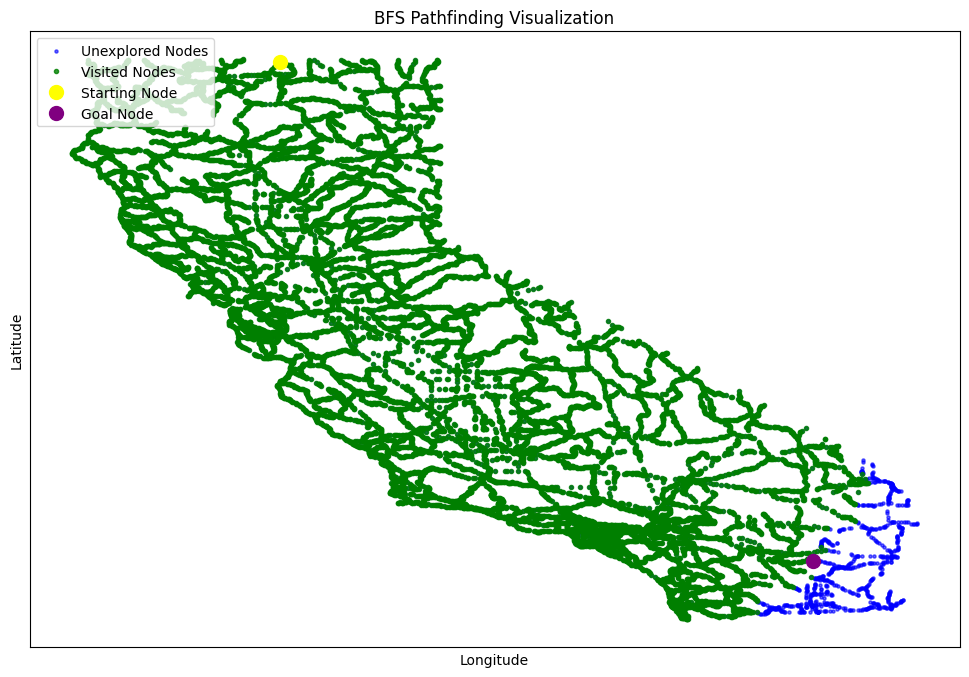

In [78]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G, start_node, goal_node, and explored are already defined

pos = {node: (data["longitude"], data["latitude"]) for node, data in C.nodes(data=True)}

fig, ax = plt.subplots(figsize=(12, 8))

# Draw all nodes in blue
nx.draw_networkx_nodes(C, pos, ax=ax, node_size=5, node_color="blue", alpha=0.6)

# Draw visited nodes in green
visited_nodes_x = [pos[node][0] for node in explored]
visited_nodes_y = [pos[node][1] for node in explored]
ax.plot(
    visited_nodes_x,
    visited_nodes_y,
    "o",
    color="green",
    markersize=3,
    alpha=0.8,
    zorder=3,
)

# Draw the path in red if it exists


# Draw start and goal nodes
starting_node_lon, starting_node_lat = pos[start_node]
goal_node_lon, goal_node_lat = pos[goal_node]

ax.plot(
    starting_node_lon,
    starting_node_lat,
    "o",
    color="yellow",
    markersize=10,
    zorder=5,
    label="Start",
)
ax.plot(
    goal_node_lon,
    goal_node_lat,
    "o",
    color="purple",
    markersize=10,
    zorder=5,
    label="End",
)

ax.legend(
    [
        "Unexplored Nodes",
        "Visited Nodes",
        "Starting Node",
        "Goal Node",
    ],
    loc="upper left",
)

plt.title("BFS Pathfinding Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

DFS in pathfinding visualization:

In [79]:
import time

start_node = 0
goal_node = 19482  

start_time = time.perf_counter_ns()
path, total_cost_dfs, explored = depth_first_search(C, start_node, goal_node)
end_time = time.perf_counter_ns()

duration_ns = end_time - start_time
duration_us_dfs = duration_ns / 1_000_000

print(f"Time for DFS: {duration_us_dfs:.2f}ms")
print(f"Total cost for DFS: {len(total_cost_dfs)}")

Time for DFS: 20.31ms
Total cost for DFS: 9647


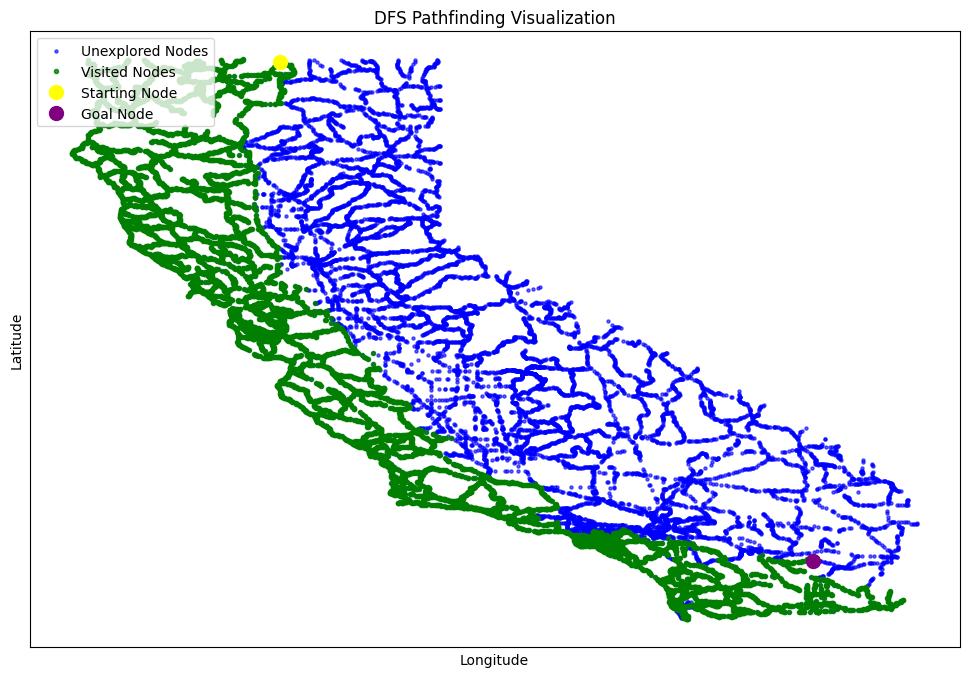

In [80]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G, start_node, goal_node, and explored are already defined

pos = {node: (data["longitude"], data["latitude"]) for node, data in C.nodes(data=True)}

fig, ax = plt.subplots(figsize=(12, 8))

# Draw all nodes in blue
nx.draw_networkx_nodes(C, pos, ax=ax, node_size=5, node_color="blue", alpha=0.6)

# Draw visited nodes in green
visited_nodes_x = [pos[node][0] for node in explored]
visited_nodes_y = [pos[node][1] for node in explored]
ax.plot(
    visited_nodes_x,
    visited_nodes_y,
    "o",
    color="green",
    markersize=3,
    alpha=0.8,
    zorder=3,
)

# Draw the path in red if it exists


# Draw start and goal nodes
starting_node_lon, starting_node_lat = pos[start_node]
goal_node_lon, goal_node_lat = pos[goal_node]

ax.plot(
    starting_node_lon,
    starting_node_lat,
    "o",
    color="yellow",
    markersize=10,
    zorder=5,
    label="Start",
)
ax.plot(
    goal_node_lon,
    goal_node_lat,
    "o",
    color="purple",
    markersize=10,
    zorder=5,
    label="End",
)

ax.legend(
    [
        "Unexplored Nodes",
        "Visited Nodes",
        "Starting Node",
        "Goal Node",
    ],
    loc="upper left",
)

plt.title("DFS Pathfinding Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

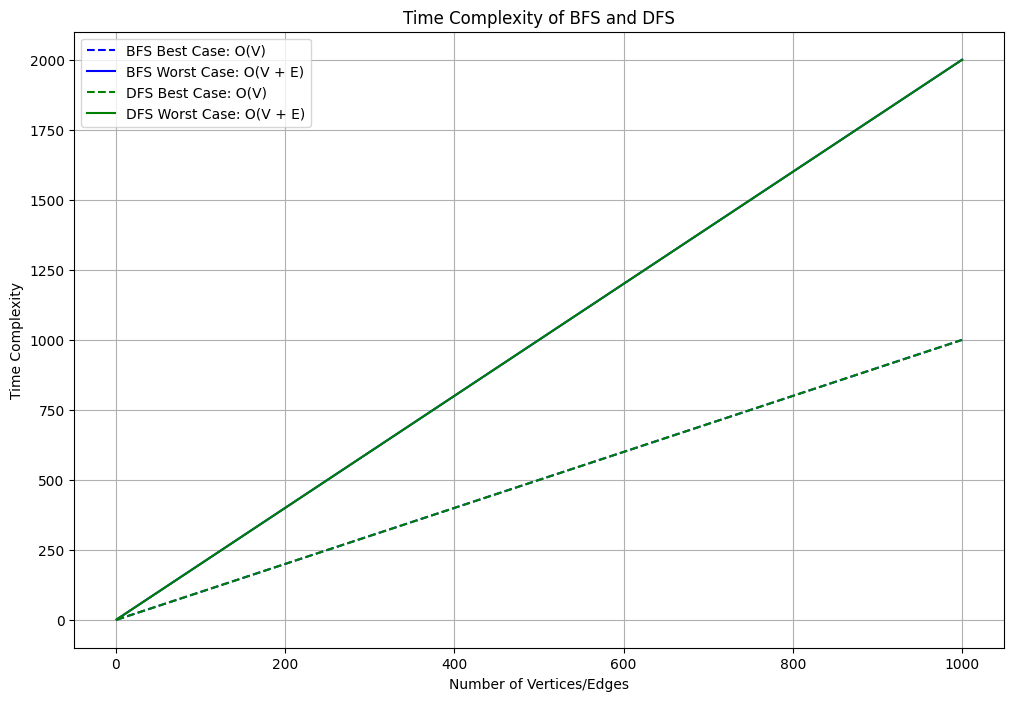

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Number of vertices and edges
vertices = np.arange(1, 1001)
edges = np.arange(1, 1001)

# Time complexity functions
def bfs_best_case(v):
    return v

def bfs_worst_case(v, e):
    return v + e

def dfs_best_case(v):
    return v

def dfs_worst_case(v, e):
    return v + e

# Plotting
plt.figure(figsize=(12, 8))

# BFS Best Case
plt.plot(vertices, bfs_best_case(vertices), label='BFS Best Case: O(V)', color='blue', linestyle='--')

# BFS Worst Case
plt.plot(vertices, bfs_worst_case(vertices, edges), label='BFS Worst Case: O(V + E)', color='blue', linestyle='-')

# DFS Best Case
plt.plot(vertices, dfs_best_case(vertices), label='DFS Best Case: O(V)', color='green', linestyle='--')

# DFS Worst Case
plt.plot(vertices, dfs_worst_case(vertices, edges), label='DFS Worst Case: O(V + E)', color='green', linestyle='-')

plt.xlabel('Number of Vertices/Edges')
plt.ylabel('Time Complexity')
plt.title('Time Complexity of BFS and DFS')
plt.legend()
plt.grid(True)
plt.show()

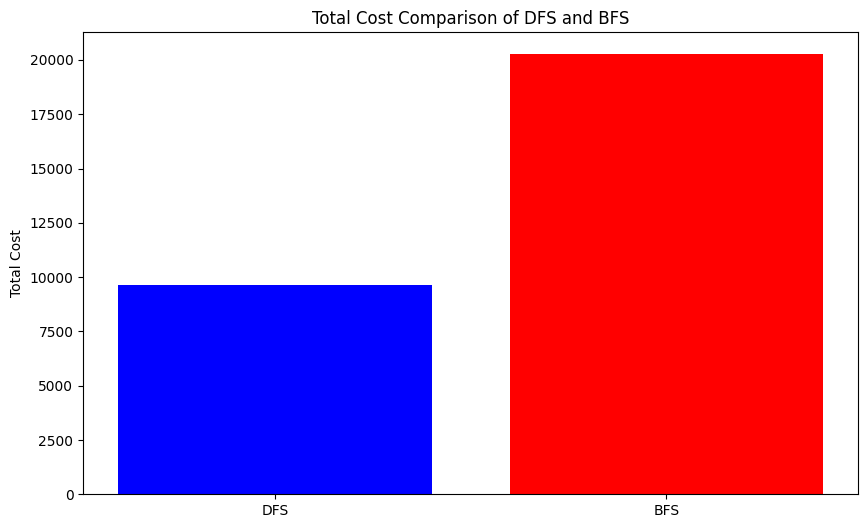

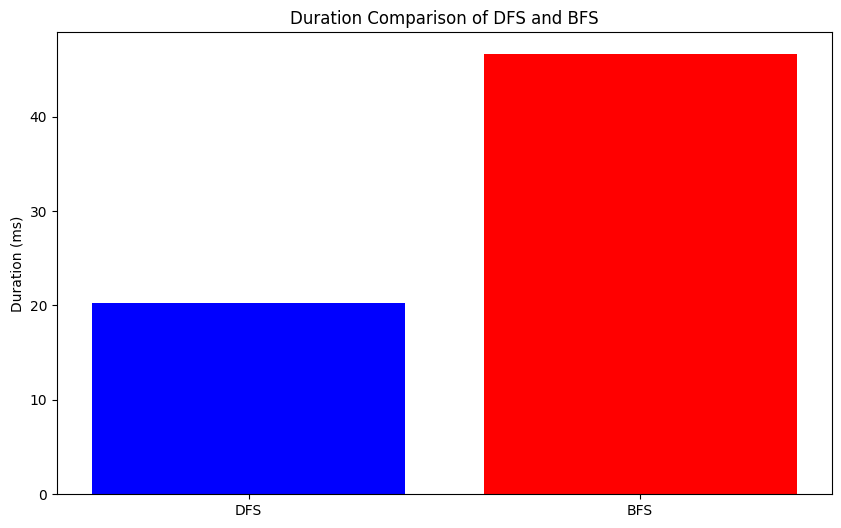

In [82]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['DFS', 'BFS']
total_costs = [len(total_cost_dfs), len(total_cost_bfs)]
durations = [duration_us_dfs, duration_us_bfs]

# Plotting total costs
plt.figure(figsize=(10, 6))
plt.bar(labels, total_costs, color=['blue', 'red'])
plt.ylabel('Total Cost')
plt.title('Total Cost Comparison of DFS and BFS')
plt.show()

# Plotting durations
plt.figure(figsize=(10, 6))
plt.bar(labels, durations, color=['blue', 'red'])
plt.ylabel('Duration (ms)')
plt.title('Duration Comparison of DFS and BFS')
plt.show()